<a href="https://colab.research.google.com/github/netrunnr/PHYS454/blob/master/KeplersLaws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Kepler's Laws


Material from part I gratefully adapted from https://github.com/katiebreivik/Keplers_Laws

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

This notebook is an interactive exploration of Kepler's laws. It also introduces functions and plotting using Python. It has two parts:

I. <a href='#SimulatingOrbits'>Simulating orbits using Kepler's Laws</a>

II. <a href='#InteractiveDerivation'>Kepler's Second Law Derivation</a>

III.  <a href='#InteractiveDerivation'>Kepler's First Law Derivation (in part)</a>

# <a id='#SimulatingOrbits'>Simulating Orbits Using Kepler's Laws</a>

We will be using python to simulate orbits and investigate how changing the mass, separation, and eccentricity changes the shape of the orbit. Johannes Kepler (1571 – 1630) formulated three laws which describe planetary motion. They are:

Kepler's Law #1: All planets move in elliptical orbits, with the sun at one focus. The place a planet resides at any time on it's orbit can be specified by the angle the planet makes from the semimajor axis. This angle is called the 'true anomaly'.

Kepler's Law #2: A line that connects a planet to the sun sweeps out equal areas in equal times.

Kepler's Law #3: The square of the period of any planet is proportional to the cube of the semimajor axis of its orbit.


First we will define all the physical constants:

In [0]:
# CONSTANTS
##############################################################################
G = 6.67384*10**(-11.0)
Msun = 1.9891*10**30.0
seconds_in_day = 86400.0
seconds_in_hour = 3600.0
seconds_in_year = 3.15569*10**7.0
day_in_year = 365.242
hours_in_day = 24.0
meters_in_AU = 1.496*10**11.0
pi = np.pi

We also need some functions that we'll use to generate orbit data. We'll write our own functions in the future. For now, notice a few things about each function:

1.   the function is named something useful, so you know what it will do
2.   the function needs variables (the things inside the parentheses) to begin and returns variables at the end
3.   the function should tell you what the physical units are for each variable

A function in python is defined by the following general format:

```
def functionname(arg1, arg2, ...):
    statement1
    statement2
    ...
```




In [0]:
#Apart from the assignment of the variable name to the value "Hello, World!" This is an example function that takes in user input and outputs

def prints_message(some_variable):
  print(some_variable)

In [0]:
#Try running the function and changing the input

print_message("Hello, World!")

Hello, World!


In [0]:
#You can define a variable in one cell...
message = "This is a very important message"

In [0]:
#...and as long as you've run that cell, you can use that variable later:

print_message(message)

This is a very important message




---


Your turn. Try making any simple function you'd like incorporating math and printing and run it. 





In [0]:
#Define your function here

In [0]:
#Run it here



---



Back to Kepler: We'll use the following functions to generate orbits for several different scenarios. The first two functions use Kepler's third law to convert between separation and orbital period. The third equation solves for every point on an orbit; this can be used to graph the orbit. Look and understand what these functions do.

In [0]:
def keplerIII_period_to_separation(p_orb):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    sep_cubed = p_orb**2
    sep = sep_cubed**(1./3.)
    
    return sep

In [0]:
def keplerIII_separation_to_period(sep):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    p_orb_squared = sep**3
    p_orb = p_orb_squared**(1./2.)
    
    return p_orb

In [0]:
def make_kepler_orbit(e,p_orb):
    ###################################################################################
    # Units: orbital period [years]                                                   #
    ###################################################################################    
    nStep = 500.0
    tRange = np.linspace(0,p_orb,nStep)
    
    theta = []
    for time in tRange:
        nHalfPorb = int(2*(time-1)/p_orb)
        PsiDiff = 1
        M = 2*np.pi*time/p_orb
        PsiOld = M
        theta0old = 180.0
        while PsiDiff > 1e-10:
        #print PsiDiff, PsiOld, e*math.sin(PsiOld)
            PsiNew = M + e*np.sin(PsiOld)
            PsiDiff = PsiNew-PsiOld
            PsiOld = PsiNew
        theta0 = 2*np.arctan(((1+e)/(1-e))**(0.5)*np.tan(PsiOld/2.))
        theta.append(theta0)        
    return theta

Notice if you don't know what some built in function does you can look it up in the documentation. For example, here is the page for the '''linspace''' function: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html (or you can google it)

---

QUESTION: Go through the make_kepler_orbit function line by line to understand and write out what each line does and translate it into "psuedocode" in the text cell below, i.e. write it out in plain english (math symbols are ok). After you're done, summarize what is happening overall.



Psuedocode version of make_kepler_orbit:

Summary of the overall function of make_kepler_orbit:

---

First, let's simulate the Earth's orbit. To do this, we need to specify all of the variables used in the 'make_kepler_orbit' function. Taking note of the units, let's fill in the mass, orbital period and eccentricity.

In [0]:
orbital_period = 1.0
eccentricity = 0.02

In [0]:
#Run the program make_kepler_orbit
list1 = make_kepler_orbit(eccentricity,orbital_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [0]:
#shows you what the value of the variable named list1 is. It's long but will appear in a scrolling window
list1

[0.0,
 0.013108101854151075,
 0.026216115388514753,
 0.039323952304207634,
 0.052431524332673375,
 0.0655387432664161,
 0.07864552097002453,
 0.09175176940019761,
 0.10485740062409707,
 0.11796232683766214,
 0.13106646038388045,
 0.14416971377100837,
 0.15727199969073527,
 0.1703732310362848,
 0.18347332092044805,
 0.1965721826935415,
 0.20966972996128422,
 0.2227658766025891,
 0.23586053678726052,
 0.2489536249935945,
 0.26204505602587386,
 0.275134745031754,
 0.28822260751953305,
 0.301308559375301,
 0.3143925168799615,
 0.32747439672612316,
 0.34055411603485175,
 0.3536315923722813,
 0.36670674376607637,
 0.3797794887217426,
 0.39284974623877855,
 0.4059174358266654,
 0.4189824775206896,
 0.43204479189759276,
 0.4451043000910454,
 0.4581609238069399,
 0.47121458533849725,
 0.48426520758118574,
 0.4973127140474436,
 0.5103570288812065,
 0.5233980768722313,
 0.5364357834702164,
 0.549470074798711,
 0.5625008776688145,
 0.5755281195926565,
 0.5885517287966613,
 0.6015716342345878,
 0.6

The true anomaly is the angle between the line from the focus to the planet and the line from focus to the planet's closest approach to the object it is orbiting. The true anomaly is shown as $\theta$ in the image below.

![angle of true anomaly](http://sat.belastro.net/satelliteorbitdetermination.com/Orbit1.gif)



To make plots, we need to be able to specify the x and y position of each true anomaly value. This is done using the kepler shape equation:



In the shape equation, theta is the true_anomaly.

The function below, orbit, computes the x and y values from the shape equation and returns them as xorbit and yorbit. We can use these x and y values to make a scatter plot of the orbit.


In [0]:
def orbit(sep,e,true_anomaly): 
    ##############################################
    # Units: separation [same as units supplied] #
    ##############################################
    
    # define the shape equation
    rorbit = sep*(1 - e**2)/(1 + e*np.cos(true_anomaly))
    xorbit = rorbit*np.cos(true_anomaly)
    yorbit = rorbit*np.sin(true_anomaly)
     
    
    return xorbit,yorbit

Notice that the orbit function needs the separation. Call (run) the needed function 



Now that we have the separation, we can call the orbit function. The orbit function needs the separation, eccentricity and true anomaly to run. Remember that the true anomaly is returned by the make_kepler_orbit function.

In [0]:
xOrbit, yOrbit = orbit(sep,eccentricity,list1)

Thanks to the orbit function, we can now plot our xorbit and yorbit values. Notice that we set: plt.axis('equal'); this makes the plot use the same size for the x and y axes. 

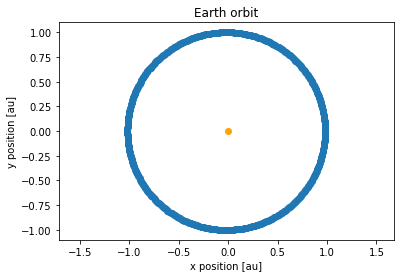

In [0]:
plt.title('Earth orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit,yOrbit)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()


---
QUESTION: Try commenting out the line that makes the axes equal by typing a '#' sign on the front part of the line. What happens to the orbit of the Earth? Why is this misleading?

---

Now that we know how to make Earth's orbit, we can make orbits for any of the planets in the Solar System on a single plot! We'll need to know the mass of the planet in units of solar mass, its orbital period in years, and its ``
```
Planet = Mercury, Mass = 1.7 × 10^(-7) solar mass, orbital period = 0.48 years, eccentricity = 0.21
Planet = Venus, Mass = 2.6 × 10^(-6) solar mass, orbital period = 0.62 years, eccentricity = 0.01
Planet = Mars, Mass = 3.2 × 10^(-7) solar mass, orbital period = 1.88 years, eccentricity = 0.09
Planet = Jupiter, Mass = 9.5 × 10^(-4) solar mass, orbital period = 11.86 years, eccentricity = 0.05
Planet = Saturn, Mass = 2.9 × 10^(-4) solar mass, orbital period = 29.46 years, eccentricity = 0.05
Planet = Uranus, Mass = 4.5 × 10^(-5) solar mass, orbital period =84.02 years, eccentricity = 0.05
Planet = Neptune, Mass = 5.2 × 10^(-5) solar mass, orbital period = 164.8 years, eccentricity = 0.01
Planet = Pluto, Mass = 6.6 × 10^(-9) solar mass, orbital period = 248.0 years, eccentricity = 0.25
```


In [0]:
# Define Mercury's parameters in this cell. Name them something useful, specific, and different than any other variables we've used in this notebook so far
#note we don't need to redefine the mass of the Sun since we already defined it above

In [0]:
# compute Mercury's true anomaly

In [0]:
# compute Mercury's separation

In [0]:
# compute Mercury's x and y orbital coordinates

In [0]:
# Plot Mercury's orbit

# <a id='#InteractiveDerivation'>Kepler's Second Law</a>

Let's convince ourselves that Kepler's second law is just [conservation of angular momentum](https://www.khanacademy.org/science/ap-physics-1/ap-torque-angular-momentum/conservation-of-angular-momentum-ap/a/conservation-of-angular-momentum-ap-physics-1) in disguise.

Kepler's second law, states an orbiter sweeps out equal area in equal time. Another way to write this is

$\frac{dA}{dt} = Constant$

We also know that because angular momentum, $L$ is conserved, 

$L = Constant$

Reminding ourselves of the definition of angular momentum, we can write $\hat{L}$ in terms of the the Sun to planet vector $\hat{r}$ and linear momentum $\hat{p}$

$\hat{L} = \hat{r} x \hat{p}$

The definition of cross product gives us

$\hat{L} = r\hat{p}_{\perp}$

And the definition of momentum $\hat{p} = mv$ gives us

$\hat{L} = rm\hat{v}_{\perp}$

$L = rm(\omega r) = mr^{2}\omega$

Now for something different, let's consider the area swept out in a time dt

$ds$ is the tiny arc along the orbit that the planet travels while it moves a tiny angle $d\theta$ around the orbit. The length of an arc is the radius times the angle it subtends, so

$ds = rd\theta$

![alt text](https://physicsabout.com/wp-content/uploads/2016/07/kepler-2nd-law.png)

The area swept out by this motion, $dA$, is given by the area of a triangle

$dA = \frac{1}{2}r(rd\theta) = \frac{1}{2}r^{2}d\theta$

Going back to our original goal, what we really want is the change in area over time $\frac{dA}{dt}$


$\frac{dA}{dt} = \frac{1}{2}r^{2}\frac{d\theta}{dt} = \frac{1}{2}r^{2}\omega$

Looking up at our earlier work, we find that we can easily go from 

$L = rm(\omega r) = mr^{2}\omega$ to

$\frac{L}{m} = r^{2}\omega$

plugging in to our expression for $\frac{dA}{dt}$


$\frac{dA}{dt} = \frac{1}{2}\frac{L}{m}$

Since angular momentum is conserved, the area over time is also constant.


# <a id='#InteractiveDerivation'>Kepler's First Law Derivation (in part)</a>

We are going to derive Kepler's law. 

$\hat{r}$ will be the radial [unit vector](https://mathworld.wolfram.com/UnitVector.html) from the origin, $\hat{x}$ and $\hat{y}$ are the unit vectors along the x and y axis (cartesian axis). Because this is the real world, we can't assume that the distance from the origin to our orbiter remains constant because it may not be on a circular orbit. If $\vec{r}$ is the vector from the origin to the object, our vector from the origin to the orbiter will change in length and direction as we move along the orbit, or move in $\theta$. This means we will have a change in radius as we change the angle, which can be written $\frac{d\vec{r}}{d\theta}$. We would like to find the value of $\frac{d\vec{r}}{d\theta}$. 


---


QUESTION: For the next step in the derivation, we will assume our orbiter is at a distance $r$ from the origin, and that the orbiter makes an angle $\theta$ with the x axis. 


![alt text](https://textimgs.s3.amazonaws.com/boundless-algebra/8e2h77svirb8tuhulx4q.jpe)

How can we express the distance $r$ in terms of the orbiter's $x$ and $y$ coordinates and the angle $\theta$? Write out the equation below:

$\hat{r} = $


---





---



Take the derivative of both sides (you may refer to this [list of the derivatives of common functions](https://http://tutorial.math.lamar.edu/pdf/common_derivatives_integrals.pdf)):

$\frac{d\vec{r}}{d\theta} = $






---



We also need to be concerned with $\hat{\theta}$. This is the vector. It is perpendicular to $\hat{r}$.


![orientation of polar unit vectors](https://i.gyazo.com/6685ade5d3ab158b496077f7481551ea.png)

I would like to assert that what you just wrote in the previous step as an expression for $\frac{d\vec{r}}{d\theta}$ is actually $\hat{\theta}$. Let me explain. We need something perpendicular to $\hat{r}$, which means the [dot product](https://hyperphysics.phy-astr.gsu.edu/hbase/vsca.html) of  $\hat{r}$ and $\hat{\theta}$ should be zero. 

TO BE CONTINUED...